29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


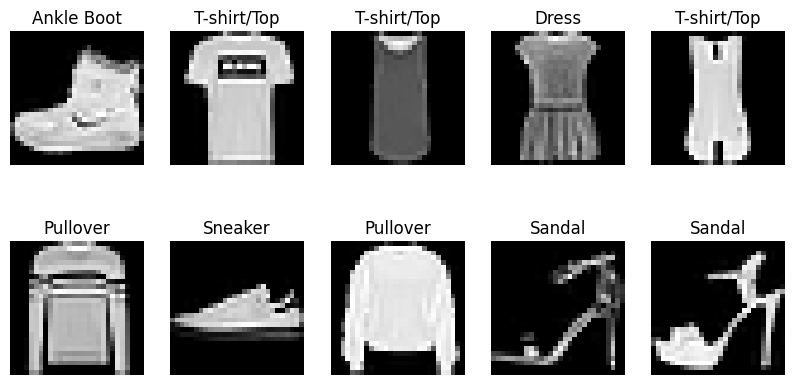

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 12ms/step - accuracy: 0.7840 - loss: 0.5933 - val_accuracy: 0.8544 - val_loss: 0.3993
Epoch 2/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 38s 11ms/step - accuracy: 0.8623 - loss: 0.3758 - val_accuracy: 0.8601 - val_loss: 0.3830
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.8783 - loss: 0.3274 - val_accuracy: 0.8646 - val_loss: 0.3743
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.8877 - loss: 0.3015 - val_accuracy: 0.8732 - val_loss: 0.3555
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.8937 - loss: 0.2776 - val_accuracy: 0.8843 - val_loss: 0.3271
Epoch 6/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 11ms/step - accuracy: 0.8984 - loss: 0.2660 - val_accuracy: 0.8742 - val_loss: 0.3410
Epoch 7/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.9040 - loss: 0.2525 - val_accuracy: 0.8739 - val_loss: 0.3527
Epoch 8/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 39s 11ms/step - accuracy: 0.9101 -

Test Accuracy: 0.8864
Model saved successfully!


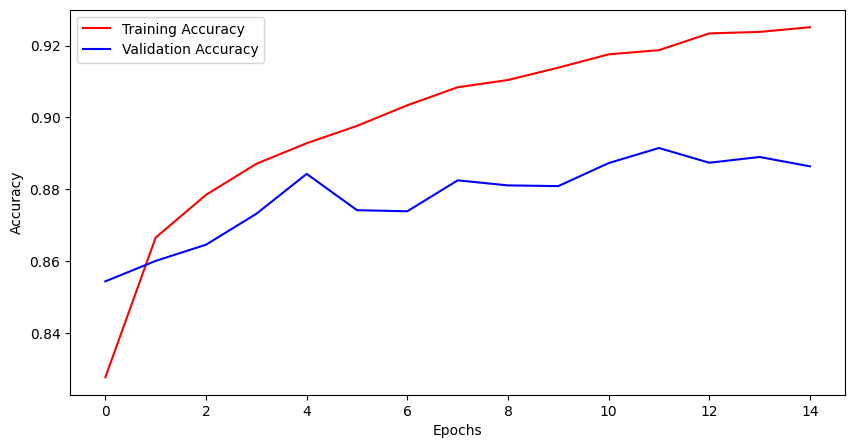

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 567,436 (2.16 MB)

 Trainable params: 567,434 (2.16 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

Loaded model weights match original model!


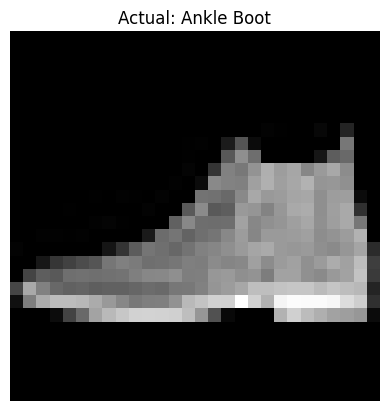

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
Model Prediction: Ankle Boot


In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import os

#  Step 1: Load Fashion MNIST Dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

# Class Names for Fashion MNIST
class_names = ['T-shirt/Top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']

#  Step 2: Visualize Sample Images
plt.figure(figsize=(10,5))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(x_train[i], cmap="gray")
    plt.title(class_names[y_train[i]])
    plt.axis("off")
plt.show()

#  Step 3: Preprocessing - Normalize & One-Hot Encoding
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalize pixel values
y_train = keras.utils.to_categorical(y_train, 10)  # Convert labels to one-hot encoding
y_test = keras.utils.to_categorical(y_test, 10)

#  Step 4: Define Neural Network Model
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  # Input Layer (Flatten 28x28 to 1D)
    keras.layers.Dense(512, activation='relu'),  # Hidden Layer 1
    keras.layers.Dense(256, activation='relu'),  # Hidden Layer 2
    keras.layers.Dense(128, activation='relu'),  # Hidden Layer 3
    keras.layers.Dense(10, activation='softmax') # Output Layer (10 categories)
])

#  Step 5: Compile Model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

#  Step 6: Implement Callbacks (TensorBoard)
log_dir = "logs/fashion_mnist"
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

#  Step 7: Train Model
history = model.fit(
    x_train, y_train,
    epochs=15,
    batch_size=32,
    validation_data=(x_test, y_test),
    callbacks=[tensorboard_callback]
)

#  Step 8: Evaluate Model Performance
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

#  Step 9: Save the Trained Model
model.save("fashion_mnist_model.h5")
print("Model saved successfully!")

#  Step 10: Plot Training & Validation Accuracy
plt.figure(figsize=(10,5))
plt.plot(history.history["accuracy"], label="Training Accuracy", color="red")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy", color="blue")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#  Step 11: Load and Verify the Saved Model
loaded_model = keras.models.load_model("fashion_mnist_model.h5")
loaded_model.summary()

#  Step 12: Check Consistency in Model Parameters & Weights
original_weights = model.get_weights()
loaded_weights = loaded_model.get_weights()

# Compare weights to ensure consistency
for i in range(len(original_weights)):
    assert np.allclose(original_weights[i], loaded_weights[i]), f"Mismatch in layer {i}"
print("Loaded model weights match original model!")

#  Step 13: Make Predictions on New Images
def predict_single_image(index):
    img = x_test[index]
    plt.imshow(img, cmap="gray")
    plt.title("Actual: " + class_names[np.argmax(y_test[index])])
    plt.axis("off")
    plt.show()

    img = np.expand_dims(img, axis=0)  # Reshape for model input
    prediction = loaded_model.predict(img)
    predicted_label = np.argmax(prediction)

    print(f"Model Prediction: {class_names[predicted_label]}")

# Example: Predicting the first test image
predict_single_image(0)
